In [128]:
# Importing Python Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [129]:
#Loading the Dataset
retail_data = pd.read_csv('C:/Users/asus/Downloads/archive (3)/retail_sales_dataset.csv')
retail_data.head()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100


In [130]:
# Couting the Number of Rows and Columns
retail_data.shape

(1000, 9)

In [131]:
# Gives information about the DataFrame
retail_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    1000 non-null   int64 
 1   Date              1000 non-null   object
 2   Customer ID       1000 non-null   object
 3   Gender            1000 non-null   object
 4   Age               1000 non-null   int64 
 5   Product Category  1000 non-null   object
 6   Quantity          1000 non-null   int64 
 7   Price per Unit    1000 non-null   int64 
 8   Total Amount      1000 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 70.4+ KB


In [132]:
# Counts the number of Duplicated Values in DataFrame
retail_data.duplicated().sum()

np.int64(0)

In [133]:
# Counts the number of Unique Values in DataFrame
retail_data.nunique()

Transaction ID      1000
Date                 345
Customer ID         1000
Gender                 2
Age                   47
Product Category       3
Quantity               4
Price per Unit         5
Total Amount          18
dtype: int64

In [134]:
# Describes the DataFrame
retail_data.describe()

,Transaction ID,Age,Quantity,Price per Unit,Total Amount
count,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000
mean,500.500000,41.39200,2.514000,179.890000,456.000000
std,288.819436,13.68143,1.132734,189.681356,559.997632
min,1.000000,18.00000,1.000000,25.000000,25.000000
25%,250.750000,29.00000,1.000000,30.000000,60.000000
50%,500.500000,42.00000,3.000000,50.000000,135.000000
75%,750.250000,53.00000,4.000000,300.000000,900.000000
max,1000.000000,64.00000,4.000000,500.000000,2000.000000


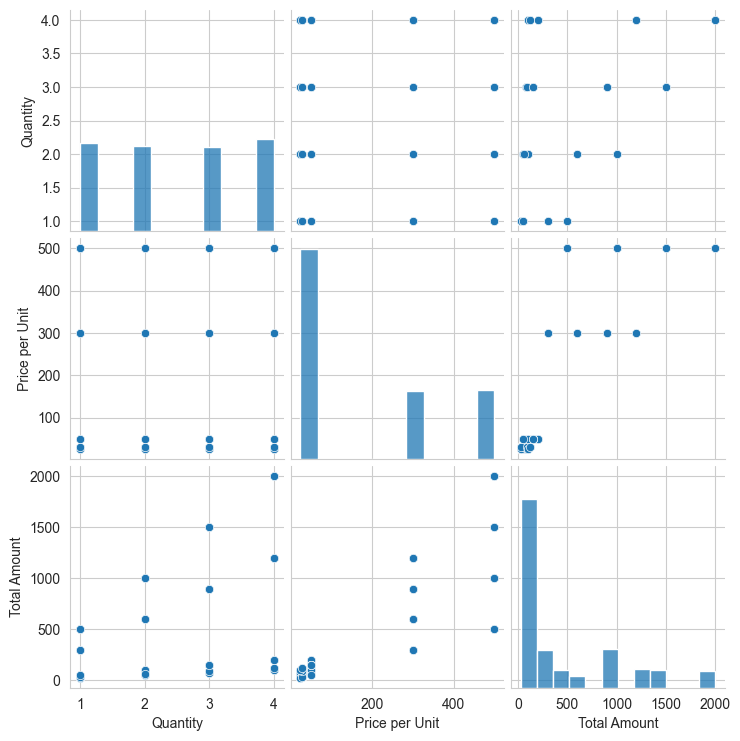

In [135]:
#Data Type Conversion and Pair Plot Visualization
retail_data["Transaction ID"]=retail_data["Transaction ID"].astype(str)
retail_data["Age"]=retail_data["Age"].astype(str)
sns.pairplot(retail_data)
plt.show()

In [136]:
# Count the number of occurrences for each gender
gender_counts = retail_data["Gender"].value_counts()
gender_counts


Gender
Female    510
Male      490
Name: count, dtype: int64

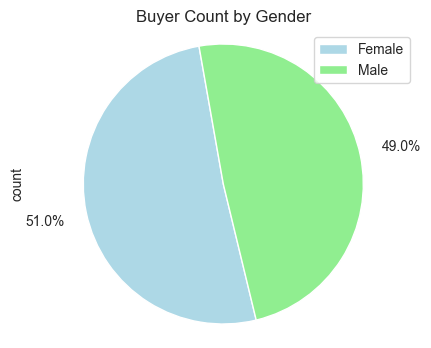

In [137]:
# Gender Distribution Visualization
gender_counts = retail_data["Gender"].value_counts()
explosion = [0, 0]
colors = ["lightblue", "lightgreen"]
gender_counts.plot(
    kind="pie",
    figsize=(5, 4),
    autopct="%1.1f%%",
    shadow=False,
    startangle=100,
    explode=explosion,
    labels=None,
    pctdistance=1.3,
    colors=colors
)
plt.title("Buyer Count by Gender")
plt.axis("equal")
plt.legend(labels=gender_counts.index)
plt.show()


In [138]:
# Calculate total sales grouped by gender
sales_by_gender = retail_data.groupby("Gender")["Total Amount"].sum()
sales_by_gender


Gender
Female    232840
Male      223160
Name: Total Amount, dtype: int64

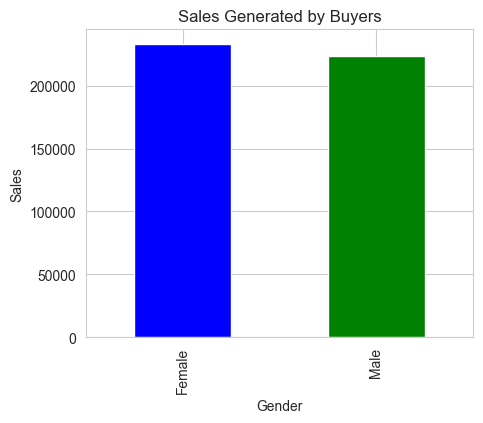

In [139]:
# Sales Contribution by Gender
sales_by_gender.plot(kind="bar", figsize=(5, 4), color=["blue", "green"])
plt.title("Sales Generated by Buyers")
plt.ylabel("Sales")
plt.show()


In [140]:
# Creating an Age Group Column
age_categories = []
for age in retail_data["Age"].astype(int):
    if age < 30:
        age_categories.append("<30 years")
    elif age > 45:
        age_categories.append(">45 years")
    else:
        age_categories.append("30-45 years")

retail_data["age_group"] = age_categories
retail_data


,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount,age_group
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150,30-45 years
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000,<30 years
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30,>45 years
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500,30-45 years
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100,30-45 years
...,...,...,...,...,...,...,...,...,...,...
995,996,2023-05-16,CUST996,Male,62,Clothing,1,50,50,>45 years
996,997,2023-11-17,CUST997,Male,52,Beauty,3,30,90,>45 years
997,998,2023-10-29,CUST998,Female,23,Beauty,4,25,100,<30 years
998,999,2023-12-05,CUST999,Female,36,Electronics,3,50,150,30-45 years


In [141]:
# Counting Buyers by Age Group
age_group_counts = retail_data["age_group"].value_counts()
age_group_counts


age_group
>45 years      424
30-45 years    325
<30 years      251
Name: count, dtype: int64

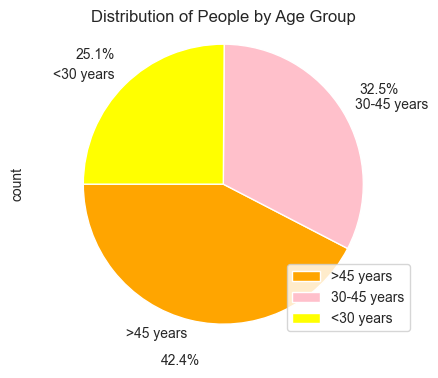

In [142]:
# Define explosion and color settings for the pie chart
explode = (0, 0, 0)  
colors = ["orange", "pink", "yellow"]
age_group_counts.plot(kind="pie", figsize=(5, 4), autopct="%1.1f%%", shadow=False, 
                      startangle=180, explode=explode, labels=age_group_counts.index, 
                      pctdistance=1.3, colors=colors)
plt.title("Distribution of People by Age Group")
plt.axis("equal")  
plt.legend(labels=age_group_counts.index)
plt.show()


In [143]:
# Calculate total sales by age group
age_sales = retail_data.groupby("age_group")["Total Amount"].sum().reset_index()
age_sales


,age_group,Total Amount
0,30-45 years,151745
1,<30 years,123155
2,>45 years,181100


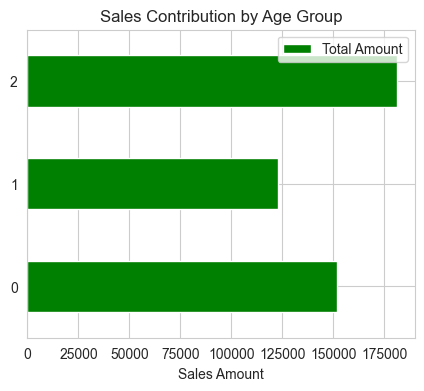

In [144]:
# Create a horizontal bar plot for sales by age group
age_sales.plot(kind="barh", figsize=(5, 4), color="green")
plt.title("Sales Contribution by Age Group")
plt.xlabel("Sales Amount")
plt.show()


In [145]:
# Count occurrences of each product category
category_counts = retail_data["Product Category"].value_counts()
category_counts


Product Category
Clothing       351
Electronics    342
Beauty         307
Name: count, dtype: int64

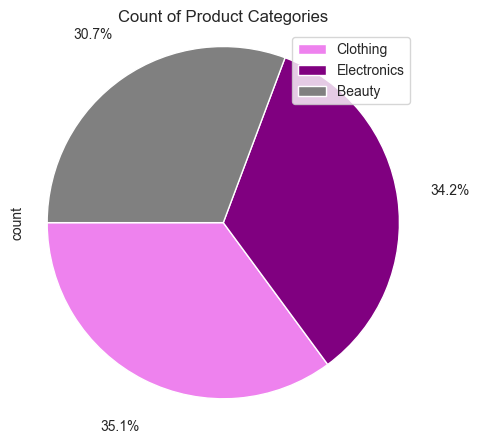

In [146]:
# Define the explosion and colors for the pie chart
explode_values = (0, 0, 0)
colors = ["violet", "purple", "Grey"]


category_counts.plot(
    kind="pie", 
    figsize=(5, 5), 
    autopct="%1.1f%%", 
    shadow=False, 
    startangle=180,
    explode=explode_values, 
    labels=None, 
    pctdistance=1.3, 
    colors=colors
)


plt.title("Count of Product Categories")
plt.axis("equal")
plt.legend(labels=category_counts.index)
plt.show()


In [147]:
# Calculate the total quantity sold for each product category
quantity_by_category = retail_data.groupby("Product Category")["Quantity"].sum()


quantity_by_category


Product Category
Beauty         771
Clothing       894
Electronics    849
Name: Quantity, dtype: int64

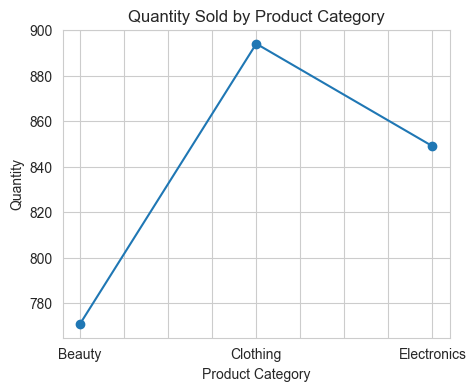

In [148]:
# Quantity sold by product category - Updated with color and chart type
plt.figure(figsize=(5, 4))
quantity_by_category.plot(kind='line', marker='o', color=['#1f77b4', '#ff7f0e', '#2ca02c'])
plt.title("Quantity Sold by Product Category")
plt.ylabel("Quantity")
plt.grid(True)
plt.show()


In [149]:
# Total Sales by Product Category
total_sales_by_category = retail_data.groupby("Product Category")["Total Amount"].sum()
total_sales_by_category


Product Category
Beauty         143515
Clothing       155580
Electronics    156905
Name: Total Amount, dtype: int64

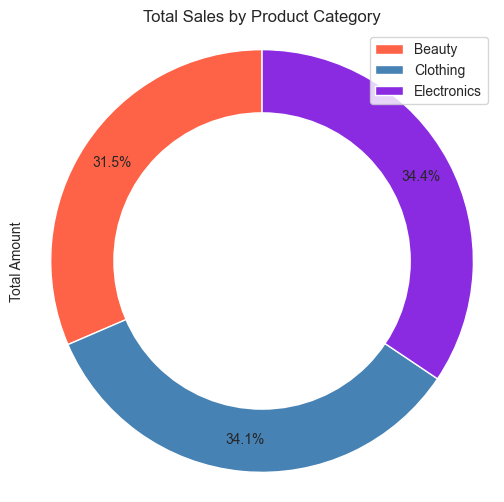

In [150]:
# Visualizing Total Sales By Product Category using Donut Chart
plt.figure(figsize=(6, 6))
colors = ['#FF6347', '#4682B4', '#8A2BE2'] 
total_sales_by_category.plot(kind='pie', labels=None, autopct='%1.1f%%', startangle=90, colors=colors, pctdistance=0.85)


centre_circle = plt.Circle((0, 0), 0.70, color='white', fc='white', linewidth=1.25)
plt.gca().add_artist(centre_circle)

plt.title('Total Sales by Product Category')
plt.axis('equal')  
plt.legend(labels=total_sales_by_category.index, loc='upper right')
plt.show()

In [151]:
#changing the data type of date column 
retail_data["Date"] = pd.to_datetime(retail_data["Date"])
retail_data["Date"]

0     2023-11-24
1     2023-02-27
2     2023-01-13
3     2023-05-21
4     2023-05-06
         ...    
995   2023-05-16
996   2023-11-17
997   2023-10-29
998   2023-12-05
999   2023-04-12
Name: Date, Length: 1000, dtype: datetime64[ns]

In [152]:
time = retail_data["Date"].value_counts()
time

Date
2023-05-16    11
2023-07-14    10
2023-05-23     9
2023-02-05     8
2023-08-05     8
              ..
2023-03-02     1
2023-08-02     1
2023-04-17     1
2023-03-30     1
2023-05-28     1
Name: count, Length: 345, dtype: int64

In [153]:
#sales over time 
time_sales = retail_data.groupby("Date")["Total Amount"].sum()
time_sales

Date
2023-01-01    3600
2023-01-02    1765
2023-01-03     600
2023-01-04    1240
2023-01-05    1100
              ... 
2023-12-27     700
2023-12-28    2075
2023-12-29    3400
2023-12-31      50
2024-01-01    1530
Name: Total Amount, Length: 345, dtype: int64

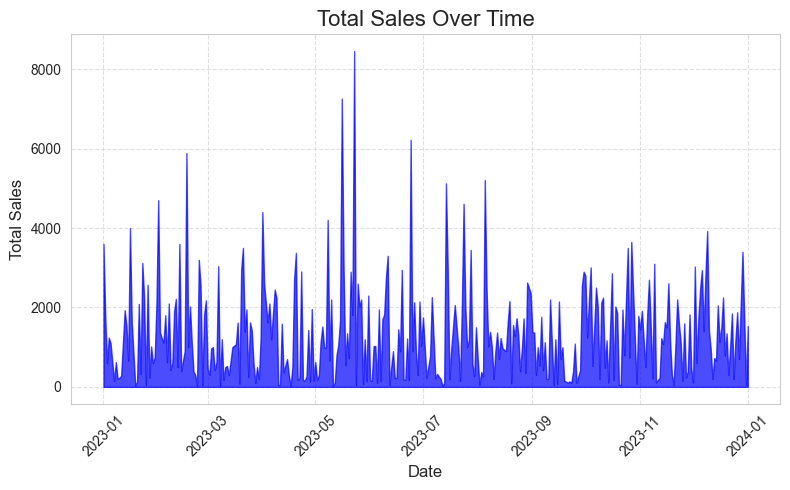

In [154]:
# Create an area plot for sales over time
plt.figure(figsize=(8, 5))
plt.fill_between(time_sales.index,time_sales.values, color="blue", alpha=0.7)
plt.title("Total Sales Over Time", fontsize=16)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Total Sales", fontsize=12)
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

In [155]:
# Calculate the average quantity sold by product category
average_quantity = retail_data.groupby('Product Category')['Quantity'].mean().reset_index().round(2)
average_quantity


,Product Category,Quantity
0,Beauty,2.51
1,Clothing,2.55
2,Electronics,2.48


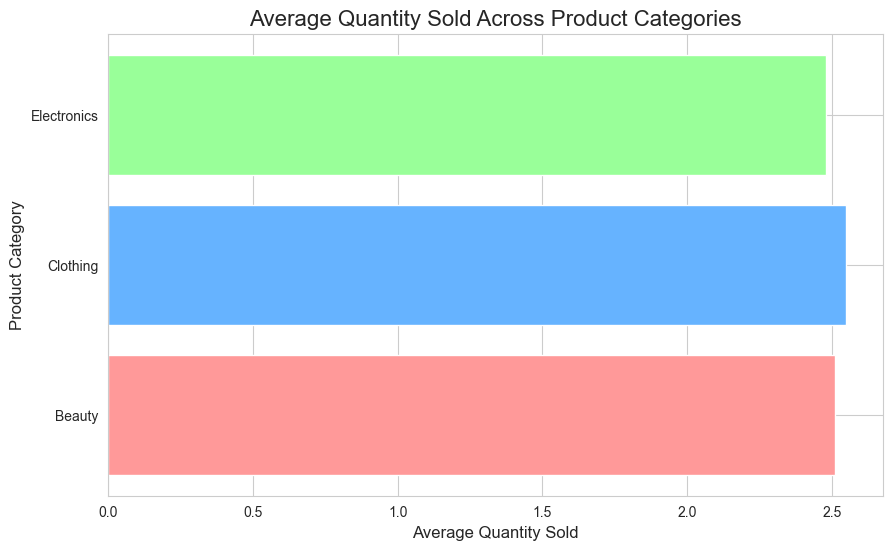

In [156]:
plt.figure(figsize=(10, 6))
plt.barh(average_quantity['Product Category'], average_quantity['Quantity'], color=['#FF9999', '#66B3FF', '#99FF99', '#FFCC99'])
plt.title('Average Quantity Sold Across Product Categories', fontsize=16)
plt.xlabel('Average Quantity Sold', fontsize=12)
plt.ylabel('Product Category', fontsize=12)
plt.show()

In [157]:
# Display the names of the columns in the DataFrame
print("Column Names in the Dataset:")
retail_data.columns
sales_pattern_df = retail_data[['Date', 'Product Category', 'Quantity', 'Total Amount']] \
    .sort_values(by='Date') \
    .reset_index(drop=True)  
sales_pattern_df['Month'] = sales_pattern_df['Date'].dt.strftime('%B')
print("Sales Pattern DataFrame:")
print(sales_pattern_df)


Column Names in the Dataset:
Sales Pattern DataFrame:
          Date Product Category  Quantity  Total Amount     Month
0   2023-01-01           Beauty         3          1500   January
1   2023-01-01         Clothing         3           900   January
2   2023-01-01         Clothing         4          1200   January
3   2023-01-02      Electronics         3            90   January
4   2023-01-02           Beauty         1            25   January
..         ...              ...       ...           ...       ...
995 2023-12-29           Beauty         2           600  December
996 2023-12-29           Beauty         3          1500  December
997 2023-12-31      Electronics         2            50  December
998 2024-01-01           Beauty         3          1500   January
999 2024-01-01      Electronics         1            30   January

[1000 rows x 5 columns]


In [158]:
# Constructing a DataFrame to analyze sales trends
sales_analysis_df = retail_data[['Date', 'Product Category', 'Quantity', 'Total Amount']] \
    .sort_values(by='Date') \
    .reset_index(drop=True)  
sales_analysis_df['Month'] = sales_analysis_df['Date'].dt.strftime('%B')
sales_analysis_df




,Date,Product Category,Quantity,Total Amount,Month
0,2023-01-01,Beauty,3,1500,January
1,2023-01-01,Clothing,3,900,January
2,2023-01-01,Clothing,4,1200,January
3,2023-01-02,Electronics,3,90,January
4,2023-01-02,Beauty,1,25,January
...,...,...,...,...,...
995,2023-12-29,Beauty,2,600,December
996,2023-12-29,Beauty,3,1500,December
997,2023-12-31,Electronics,2,50,December
998,2024-01-01,Beauty,3,1500,January


In [159]:
# Summarizing total revenue by date
revenue_summary = sales_analysis_df.groupby('Date')['Total Amount'] \
    .sum() \
    .reset_index() \
    .rename(columns={'Total Amount': 'Total Revenue'})
revenue_summary


,Date,Total Revenue
0,2023-01-01,3600
1,2023-01-02,1765
2,2023-01-03,600
3,2023-01-04,1240
4,2023-01-05,1100
...,...,...
340,2023-12-27,700
341,2023-12-28,2075
342,2023-12-29,3400
343,2023-12-31,50


In [160]:
# Calculate total sales on a monthly basis
total_sales_monthly = sales_analysis_df.groupby('Month')['Total Amount'] \
    .agg('sum') \
    .reset_index() \
    .rename(columns={'Total Amount': 'Total Revenue'}) \
    .sort_values('Total Revenue', ascending=False)
total_sales_monthly


,Month,Total Revenue
8,May,53150
10,October,46580
2,December,44690
3,February,44060
4,January,36980
1,August,36960
6,June,36715
5,July,35465
9,November,34920
0,April,33870


In [161]:
# Set the Month column to be a categorical type with the specified order
total_sales_monthly['Month'] = pd.Categorical(total_sales_monthly['Month'], 
    categories=['January', 'February', 'March', 'April', 'May', 'June', 
                'July', 'August', 'September', 'October', 'November', 'December'], 
    ordered=True)
total_sales_monthly = total_sales_monthly.sort_values('Month')
total_sales_monthly


,Month,Total Revenue
4,January,36980
3,February,44060
7,March,28990
0,April,33870
8,May,53150
6,June,36715
5,July,35465
1,August,36960
11,September,23620
10,October,46580


In [162]:
# Sort total sales monthly by Month
total_sales_monthly = total_sales_monthly.sort_values('Month')
months = total_sales_monthly['Month']
total_revenue = total_sales_monthly['Total Revenue']



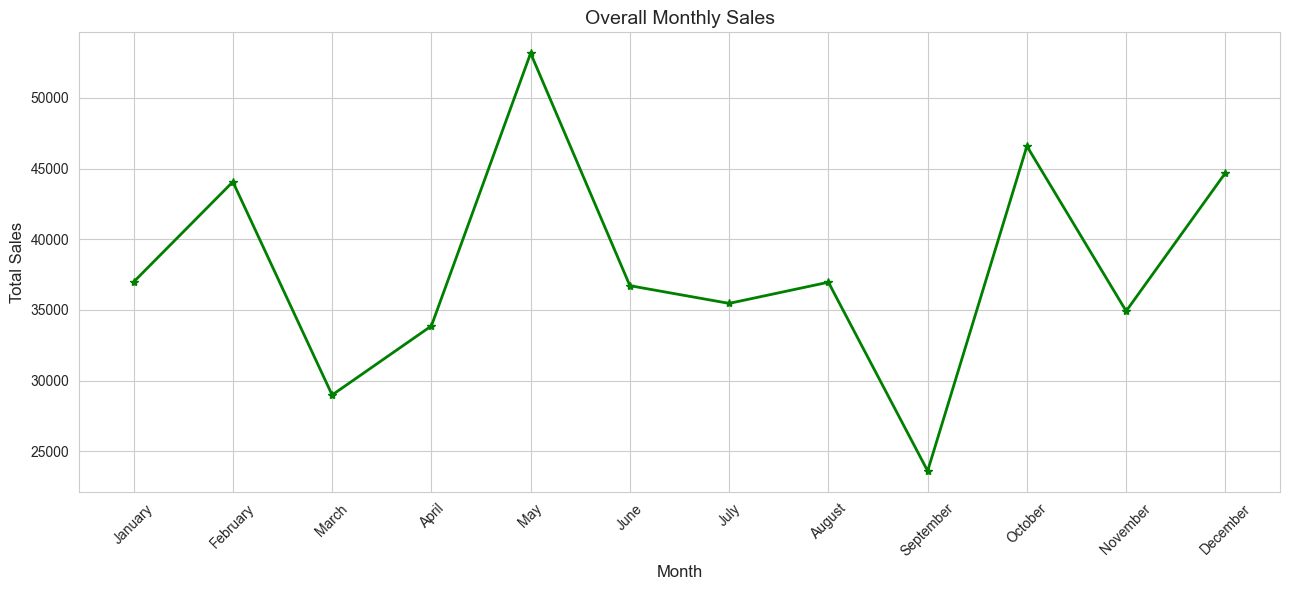

In [163]:
# Creating a Line Chart for Overall Monthly Sales
sns.set_style('whitegrid')
plt.figure(figsize=(13, 6))
plt.plot(months, total_revenue, marker='*', color='Green', linewidth=2, markersize=6) 
plt.xlabel('Month', fontsize=12)
plt.ylabel('Total Sales', fontsize=12)
plt.title("Overall Monthly Sales", fontsize=14)
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()  
plt.show()


In [164]:
# Selecting relevant columns from the retail_data DataFrame
product_age_data = retail_data[['Product Category', 'Age']]
frequency_table = {}
categories = ['Beauty', 'Clothing', 'Electronics']  
for category in categories:
    frequency_table[category] = {}  
    for _, row in product_age_data.iterrows():
        if row['Product Category'] == category: 
            age = row['Age']
      
            frequency_table[category][age] = frequency_table[category].get(age, 0) + 1
frequency_data = []
for category, age_counts in frequency_table.items():
    for age, count in age_counts.items():
        frequency_data.append((category, age, count))
frequency_df = pd.DataFrame(frequency_data, columns=['Product Category', 'Age', 'Count'])
print(frequency_df)


    Product Category Age  Count
0             Beauty  34     12
1             Beauty  30     12
2             Beauty  45      9
3             Beauty  35      6
4             Beauty  50      5
..               ...  ..    ...
136      Electronics  60      9
137      Electronics  24      6
138      Electronics  27      4
139      Electronics  33      1
140      Electronics  32      2

[141 rows x 3 columns]


In [165]:
# Prepare a list to hold data for the DataFrame
data_list = []
for category, age_counts in frequency_table.items():
    for age, count in age_counts.items():
        data_list.append((age, category, count))
# Create a DataFrame from the collected data
category_age_df = pd.DataFrame(data_list, columns=['Age', 'Product Category', 'Count'])
category_age_pivot = category_age_df.pivot(index='Age', columns='Product Category', values='Count').fillna(0)
# Sort the pivot table by 'Clothing' counts in descending order and reset the index
category_age_sorted = category_age_pivot.sort_values(by='Clothing', ascending=False).reset_index()
category_age_sorted = category_age_sorted.rename(columns={
    'Beauty': 'Amount_Beauty',
    'Clothing': 'Amount_Clothing',
    'Electronics': 'Amount_Electronics'
})
print(category_age_sorted.head())


Product Category Age  Amount_Beauty  Amount_Clothing  Amount_Electronics
0                 43              6               13                  12
1                 64             10               13                   8
2                 26              4               11                   7
3                 40              4               11                   9
4                 47             10               11                   5


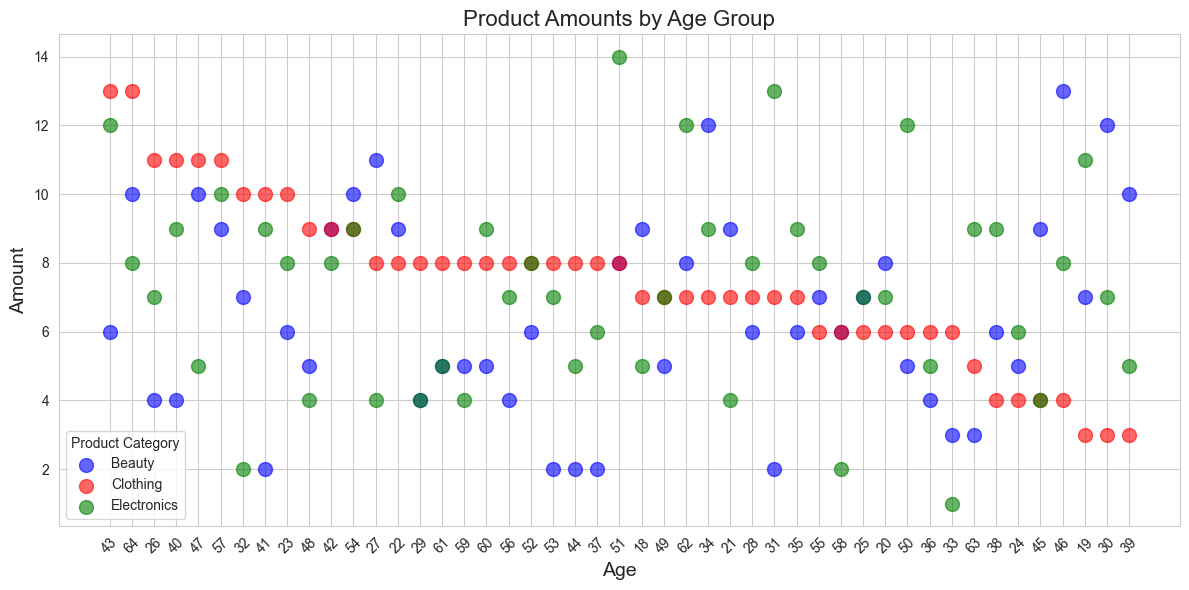

In [166]:
# Create a scatter plot for Product Amounts by Age Group
plt.figure(figsize=(12, 6))
plt.scatter(data=category_age_sorted, x='Age', y='Amount_Beauty', s=100, color='blue', label='Beauty', alpha=0.6)
plt.scatter(data=category_age_sorted, x='Age', y='Amount_Clothing', s=100, color='red', label='Clothing', alpha=0.6)
plt.scatter(data=category_age_sorted, x='Age', y='Amount_Electronics', s=100, color='green', label='Electronics', alpha=0.6)
plt.title('Product Amounts by Age Group', fontsize=16)
plt.xlabel('Age', fontsize=14)
plt.ylabel('Amount', fontsize=14)
plt.legend(title='Product Category')
plt.xticks(rotation=45)  
plt.grid(True)  
plt.tight_layout()  
plt.show()


# INSIGHTS
## 1. Count of Buyers by Age Group
Insight: This snippet elegantly computes the number of buyers segmented by age groups using value_counts().
Implication: The resulting output reveals the demographic composition of your customer base, showcasing which age groups are most actively engaging with your products. Such insights are invaluable for tailoring marketing strategies that resonate with specific age demographics, ultimately driving sales.
## 2. Sales Contribution by Age Group
Insight: By aggregating total sales across various age brackets, this code employs groupby() to unveil the financial contributions of each age group to overall revenue.
Implication: Understanding which age groups yield the highest sales allows businesses to optimize their advertising efforts, focusing on those demographics that demonstrate the greatest purchasing power.
## 3. Count of Products
Insight: This snippet systematically calculates the count of products available across different categories, providing a clear snapshot of inventory diversity.
Implication: The output empowers inventory managers to assess product popularity and inform restocking strategies, ensuring that high-demand items are readily available to meet consumer needs.
## 4. Quantity Sold by Product Category
Insight: Using groupby(), this code snippet aggregates total quantities sold for each product category, highlighting performance metrics.
Implication: The insights derived from this analysis enable businesses to identify high-performing categories, facilitating data-driven decisions regarding product promotions and inventory focus.
## 5. Total Sales by Product Category
Insight: This snippet meticulously calculates total sales revenue per product category, providing a monetary perspective on sales performance.
Implication: By understanding revenue generation across categories, businesses can evaluate profitability and make strategic decisions regarding product line expansions or reductions based on financial performance.
## 6. Sales Over Time
Insight: By aggregating daily sales figures, this code snippet allows for a robust time series analysis of sales patterns.
Implication: Identifying trends over time—such as peak sales periods—equips businesses with the knowledge needed to plan marketing campaigns and optimize inventory levels accordingly.
## 7. Average Quantity Sold by Product Category
Insight: This snippet calculates the average quantity sold across various product categories, revealing patterns in consumer purchasing behavior.
Implication: Understanding average sales volumes empowers businesses to assess product performance over time, guiding strategic decisions regarding pricing and promotional activities to boost sales.
## 8. Monthly Sales Analysis
Insight: By summarizing total sales on a monthly basis and organizing them, this code provides a comprehensive overview of sales dynamics.
Implication: Analyzing monthly sales data not only reveals seasonal trends but also informs strategic planning, helping businesses prepare for demand fluctuations and optimize marketing efforts.
## 9. Frequency Table of Product Category by Age
Insight: This snippet constructs a detailed frequency table that outlines the sales distribution of products across age groups for each category.
Implication: Understanding demographic preferences through this analysis enables targeted marketing campaigns, fostering deeper connections with specific consumer segments and enhancing customer satisfaction.
## 10. Scatter Plot of Amounts by Age Group
Insight: Utilizing a scatter plot, this code visualizes the relationship between age groups and amounts sold for different product categories.
Implication: The visualization provides an engaging representation of data, allowing quick comparisons between age demographics for each category. This approach highlights trends and patterns, making it easier to derive actionable insights that can enhance product offerings and marketing strategies.

## Recommendations
Utilize targeted marketing campaigns based on age demographics to maximize outreach and sales conversion rates. Optimize inventory management by focusing on popular product categories and adjusting stock levels accordingly. Leverage insights from sales trends to inform strategic planning, ensuring readiness for demand fluctuations, and refine product offerings based on customer preferences to enhance engagement and satisfaction. Additionally, implement promotional strategies for high-performing categories to further boost sales and profitability.

